In [1]:
import shutil, os, pathlib
for p in [pathlib.Path.home()/".nv/ComputeCache",
          pathlib.Path.home()/".cache/jax",
          pathlib.Path.home()/".cache/xla"]:
    shutil.rmtree(p, ignore_errors=True)
print("caches cleared; restart kernel and re-run the first cell.")

caches cleared; restart kernel and re-run the first cell.


In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ.setdefault("JAX_PLATFORMS", "cuda")
os.environ.setdefault("JAX_ENABLE_X80", "True")
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "True"
#os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.65" 

import jax, jax.numpy as jnp

In [3]:
import os, sys
os.chdir("/home/agnes/Skyclean")       # repo root
sys.path.insert(0, os.getcwd())

from skyclean.silc.ilc import ProduceSILC
from skyclean.silc.ilc import SILCTools
from skyclean.silc.file_templates import FileTemplates
from skyclean.silc.pipeline import Pipeline
from skyclean.silc.power_spec import MapAlmConverter, PowerSpectrumTT
from skyclean.silc.map_tools import SamplingConverters, MWTools  
from skyclean.silc.download import DownloadData
from skyclean.silc.harmonic_response import HRFigures, HarmonicWindows, AxisymmetricGenerators

In [4]:
directory = "/Scratch/agnes/data" 
ft = FileTemplates(directory).file_templates

# INPUT wavelet coeff template (uses {comp}, {frequency}, {scale}, {realisation:05d}, {lmax}, {lam})
file_template = ft.get("wavelet_coeffs") or ft["wavelet_c_j"]

# OUTPUT templates expected by ILC_wav_coeff_maps_MP (use {component}, {extract_comp}, {realisation})
output_templates = {
    "doubled_maps":           ft["doubled_maps"],
    "covariance_matrices":    ft["covariance_matrices"],
    "weight_vector_matrices": ft["weight_vector_matrices"],
    "ilc_maps":               ft["ilc_maps"],
    "trimmed_maps":           ft["trimmed_maps"],
    "ilc_synth":              ft["ilc_synth"],
    "ilc_spectrum":           ft.get("ilc_spectrum"),  
    "scaling_coeffs":         ft["scaling_coeffs"], 
    "f_scal":                 ft["f_scal"],
}

In [5]:
if __name__ == "__main__":                    
    import multiprocessing as mp
    mp.set_start_method("spawn", force=True) 

In [6]:
pipe = Pipeline( 
    components=['tsz'], 
    wavelet_components=["cfn"], 
    ilc_components=['cmb'], 
    frequencies=["030","044","070","100","143","217","353","545","857"], 
    realisations=1, 
    start_realisation=0, 
    lmax=128, 
    N_directions=1, 
    lam=2.0, 
    method="jax_cuda", 
    visualise=True, 
    save_ilc_intermediates=True,
    overwrite=True, 
    directory="/Scratch/agnes/data", 
    constraint=True,
    )

In [7]:
pipe.step_download()

--- STARTING DATA DOWNLOAD ---
Device 0: bytes_in_use=0 peak_bytes_in_use=0 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=0
File /Scratch/agnes/data/CMB_realisations/tsz_f030.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f044.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f070.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f100.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f143.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f217.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f353.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f545.fits already exists. Skipping download.
File /Scratch/agnes/data/CMB_realisations/tsz_f857.fits already exists. Skipping download.
cmb_spectrum.txt already exists. Skipping dow

In [8]:
pipe.step_process()

--- PROCESSING CFNs AND TOTAL MAP CFN ---
Device 0: bytes_in_use=0 peak_bytes_in_use=0 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=0


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 030 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f030_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 044 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f044_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 070 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f070_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 100 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f100_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 143 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f143_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 217 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f217_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 353 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f353_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 545 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f545_r0000_lmax128.npy


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


CFN map at 857 GHz for realisation 0 saved to /Scratch/agnes/data/CFN_realisations/cfn_f857_r0000_lmax128.npy


--- PRODUCING WAVELET TRANSFORMS ---
Device 0: bytes_in_use=0 peak_bytes_in_use=0 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=0


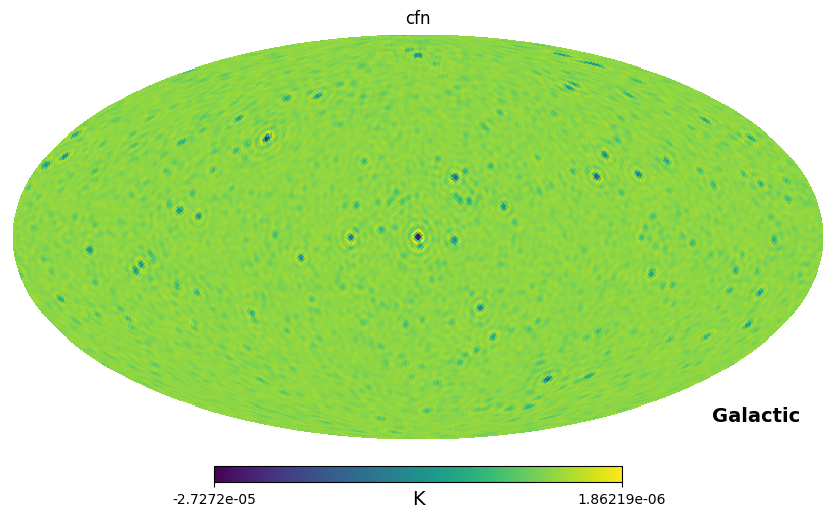

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 030 GHz for realisation 0 saved.


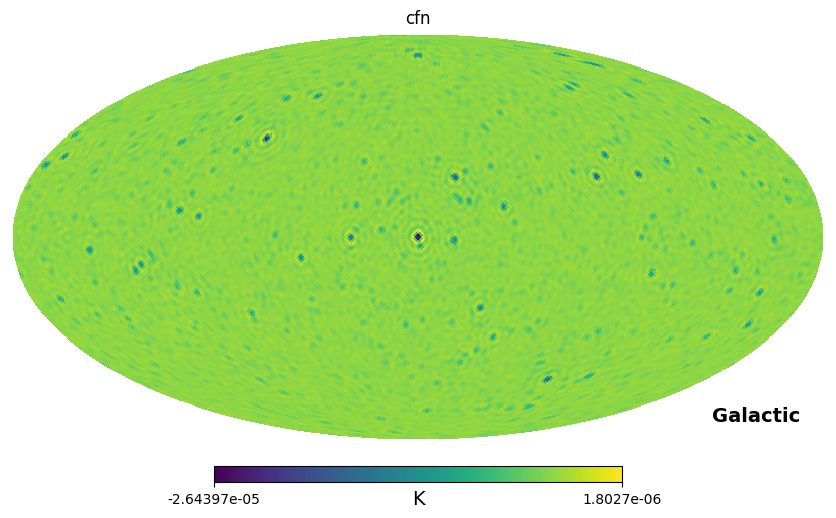

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 044 GHz for realisation 0 saved.


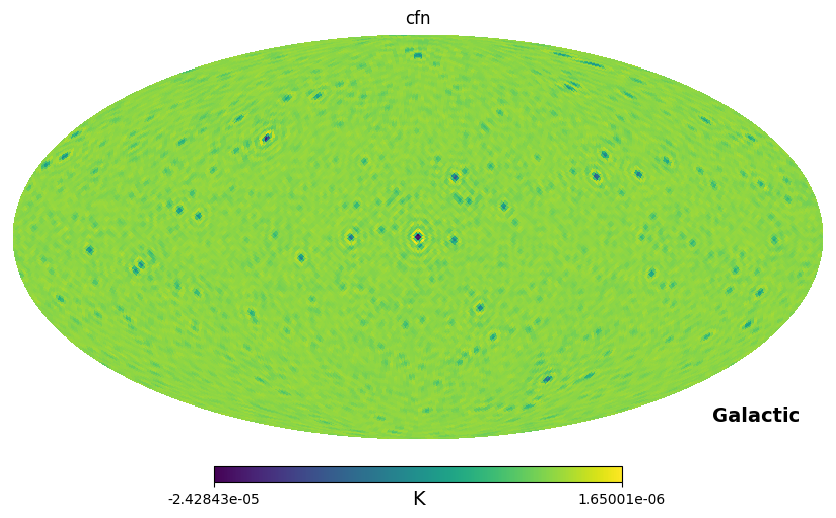

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 070 GHz for realisation 0 saved.


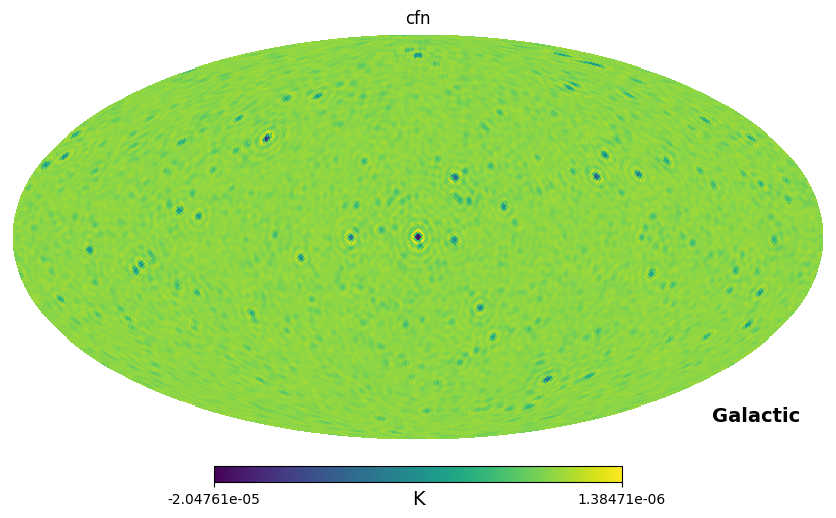

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 100 GHz for realisation 0 saved.


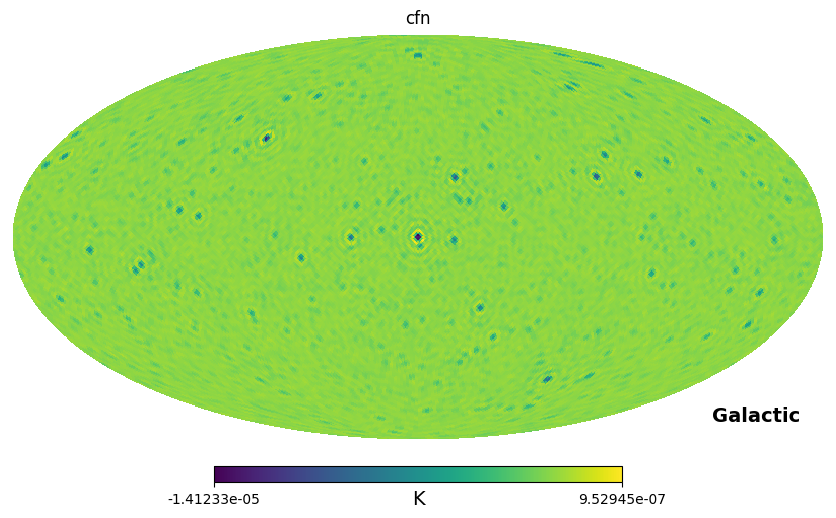

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 143 GHz for realisation 0 saved.


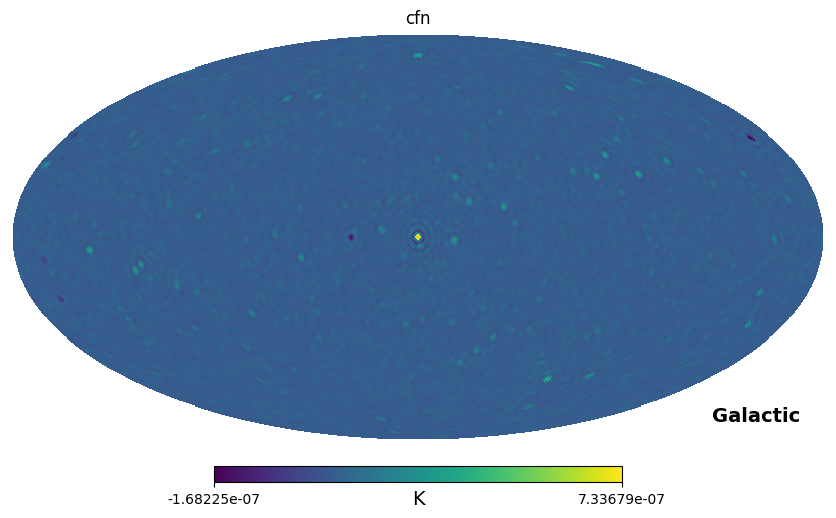

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 217 GHz for realisation 0 saved.


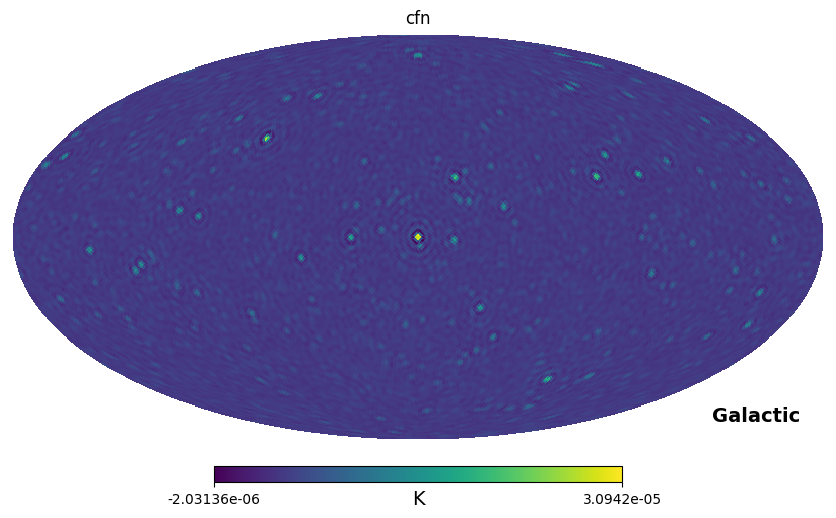

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 353 GHz for realisation 0 saved.


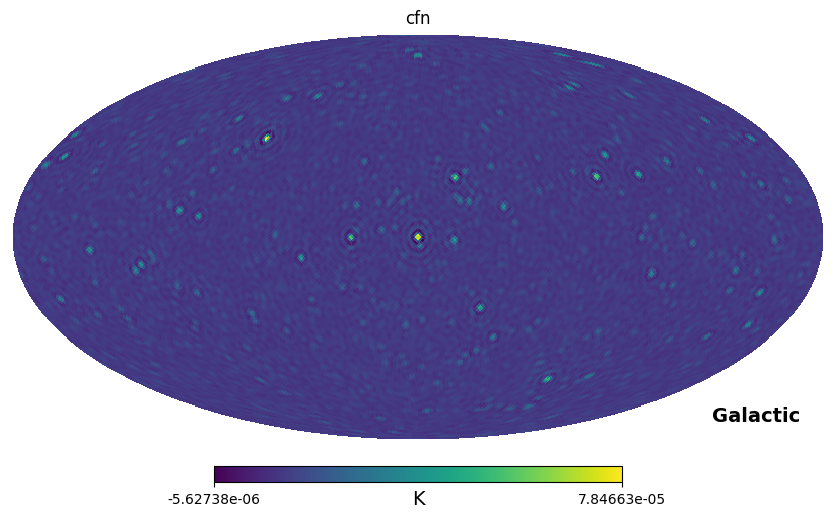

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 545 GHz for realisation 0 saved.


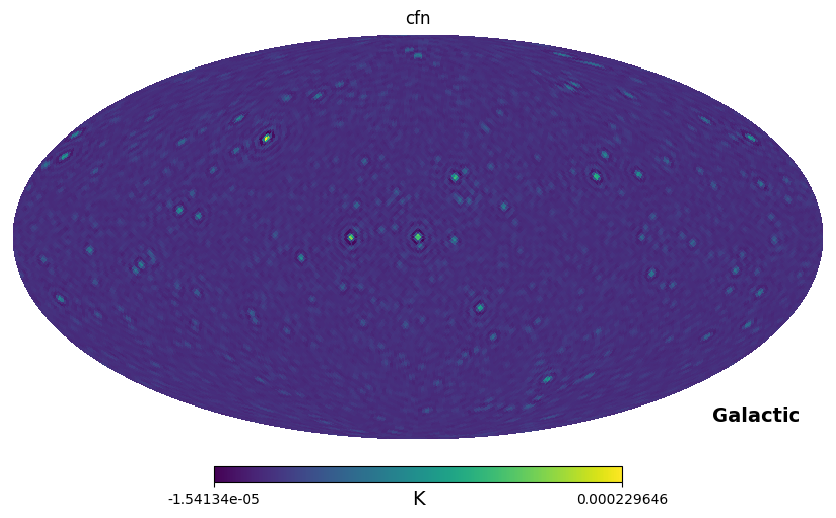

shape: (9, 129, 257)
shape: (129,)
Wavelet transform for cfn at 857 GHz for realisation 0 saved.


In [9]:
pipe.step_wavelets()

In [10]:
freq = 30
lmax = 128
lam  = 2.0  # unused for CFN filenames

tag_wave = f"_lmax{lmax}_lam{lam}"
tag_cfn1 = f"_f{freq}_"        # e.g. "_f30_"
tag_cfn2 = f"_lmax{lmax}"      # e.g. "_lmax128"

ft = FileTemplates(directory="/Scratch/agnes/data")

# Wavelet coeffs (lmax128, lam2.0)
print("Wavelet coeff files (lmax128, lam2.0):")
for f in sorted(os.listdir(ft.output_directories["wavelet_coeffs"])):
    if tag_wave in f:
        print("  ", f)

# Scaling coeffs (lmax128, lam2.0)
print("Scaling coeff files (lmax128, lam2.0):")
for f in sorted(os.listdir(ft.output_directories["scaling_coeffs"])):
    if tag_wave in f:
        print("  ", f)

# f_scal (lmax128, lam2.0)
print("f_scal files (lmax128, lam2.0):")
for f in sorted(os.listdir(ft.output_directories["f_scal"])):
    if tag_wave in f:
        print("  ", f)

# CFN for f30 (and lmax128)
print("CFN files (f30, lmax128):")
for f in sorted(os.listdir(ft.output_directories["cfn"])):
    if (tag_cfn1 in f) and (tag_cfn2 in f):
        print("  ", f)


Wavelet coeff files (lmax128, lam2.0):
   cfn_wavelet_f030_s0_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s1_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s2_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s3_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s4_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s5_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s6_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s7_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s8_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f030_s9_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s0_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s1_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s2_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s3_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s4_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s5_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s6_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s7_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s8_r00000_lmax128_lam2.0.npy
   cfn_wavelet_f044_s9_r00000_

In [15]:
import os
import numpy as np
import jax.numpy as jnp

freq = 30
lmax = 128
L = lmax + 1
lam = 2.0
prefix = "cfn"
wavelet_dir = ft.output_directories["wavelet_coeffs"]

wavelet_coeffs = []
for s in range(10):
    fname = f"{prefix}_wavelet_f{freq:03d}_s{s}_r00000_lmax{lmax}_lam{lam}.npy"
    fpath = os.path.join(wavelet_dir, fname)
    if not os.path.exists(fpath):
        print(f"Missing {fname}")
        continue
    w = np.load(fpath)
    # add leading direction axis if needed
    if w.ndim == 2 and w.shape != (1, 1):
        w = w[None, :, :]          # (1, ℓ_j, m_j)
    wavelet_coeffs.append(jnp.array(w))
    print(f"Loaded {fname} -> shape {w.shape}")

# final sanity check should look like your valid pattern
print([w.shape for w in wavelet_coeffs])

MW_Pix = MWTools.inverse_wavelet_transform(
    wavelet_coeffs=wavelet_coeffs,   # index 0 is taken as f_scal internally
    L=L,
    N_directions=1,
    lam=lam,
)
out_path = os.path.join(wavelet_dir, f"{prefix}_recon_f{freq:03d}_lmax{lmax}_lam{lam}.npy")
np.save(out_path, np.asarray(MW_Pix))
print(f"✅ saved reconstructed map → {out_path}")


Loaded cfn_wavelet_f030_s0_r00000_lmax128_lam2.0.npy -> shape (1, 1)
Loaded cfn_wavelet_f030_s1_r00000_lmax128_lam2.0.npy -> shape (1, 4, 7)
Loaded cfn_wavelet_f030_s2_r00000_lmax128_lam2.0.npy -> shape (1, 4, 7)
Loaded cfn_wavelet_f030_s3_r00000_lmax128_lam2.0.npy -> shape (1, 8, 15)
Loaded cfn_wavelet_f030_s4_r00000_lmax128_lam2.0.npy -> shape (1, 16, 31)
Loaded cfn_wavelet_f030_s5_r00000_lmax128_lam2.0.npy -> shape (1, 32, 63)
Loaded cfn_wavelet_f030_s6_r00000_lmax128_lam2.0.npy -> shape (1, 64, 127)
Loaded cfn_wavelet_f030_s7_r00000_lmax128_lam2.0.npy -> shape (1, 128, 255)
Loaded cfn_wavelet_f030_s8_r00000_lmax128_lam2.0.npy -> shape (1, 129, 257)
Loaded cfn_wavelet_f030_s9_r00000_lmax128_lam2.0.npy -> shape (1, 129, 257)
[(1, 1), (1, 4, 7), (1, 4, 7), (1, 8, 15), (1, 16, 31), (1, 32, 63), (1, 64, 127), (1, 128, 255), (1, 129, 257), (1, 129, 257)]
✅ saved reconstructed map → /Scratch/agnes/data/wavelet_transforms/wavelet_coeffs/cfn_recon_f030_lmax128_lam2.0.npy


MW alm shape: (129, 257)


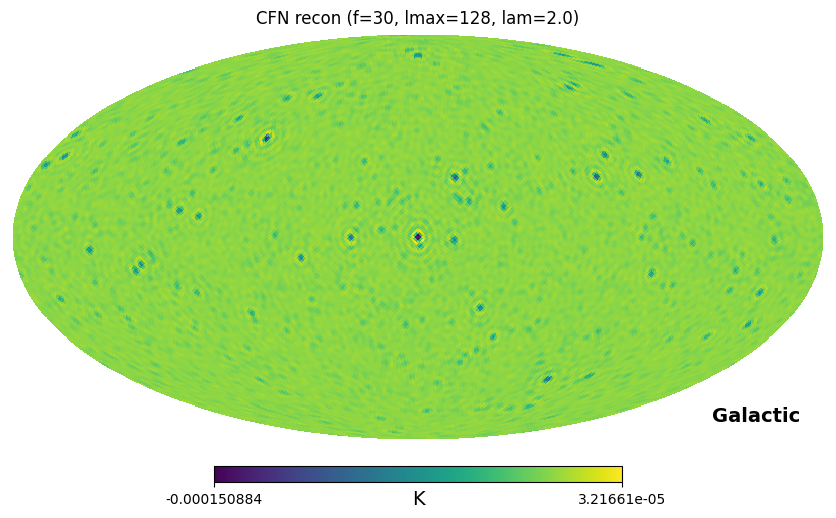

In [19]:
import numpy as np

path = "/Scratch/agnes/data/wavelet_transforms/wavelet_coeffs/cfn_recon_f030_lmax128_lam2.0.npy"
MW_Pix = np.load(path)

SILCTools.visualize_MW_Pix_map(
    MW_Pix_Map=MW_Pix,
    title="CFN recon (f=30, lmax=128, lam=2.0)",
    coord=["G"],
    unit="K",
    is_MW_alm=False,   # it's a spatial MW map from synthesis
)


In [ ]:
import os

ft = FileTemplates(directory="/Scratch/agnes/data")

# Change this to whichever you want to inspect:
dirs = [
    ft.output_directories["processed_maps"],     # processed NPY (e.g., processed_tsz_f30_lmax128.npy)
]

for d in dirs:
    print(f"\n{d}:")
    if not os.path.exists(d):
        print("  (does not exist)")
        continue
    entries = sorted(os.listdir(d))
    if not entries:
        print("  (empty)")
    else:
        for name in entries:
            print("  ", name)



/Scratch/agnes/data/processed_maps:
   processed_cmb_r0000_lmax10.npy
   processed_cmb_r0000_lmax1024.npy
   processed_cmb_r0000_lmax1028.npy
   processed_cmb_r0000_lmax124.npy
   processed_cmb_r0000_lmax128.npy
   processed_cmb_r0000_lmax256.npy
   processed_cmb_r0000_lmax264.npy
   processed_cmb_r0000_lmax265.npy
   processed_cmb_r0000_lmax32.npy
   processed_cmb_r0000_lmax512.npy
   processed_cmb_r0000_lmax64.npy
   processed_cmb_r0000_lmax65.npy
   processed_cmb_r0001_lmax512.npy
   processed_cmb_r0002_lmax512.npy
   processed_dust_f030_lmax512.npy
   processed_dust_f044_lmax512.npy
   processed_dust_f070_lmax512.npy
   processed_dust_f100_lmax512.npy
   processed_dust_f143_lmax512.npy
   processed_dust_f217_lmax512.npy
   processed_dust_f353_lmax512.npy
   processed_dust_f545_lmax512.npy
   processed_dust_f857_lmax512.npy
   processed_noise_f030_r00000_lmax10.npy
   processed_noise_f030_r00000_lmax1024.npy
   processed_noise_f030_r00000_lmax1028.npy
   processed_noise_f030_r00000

MW alm shape: (129, 257)


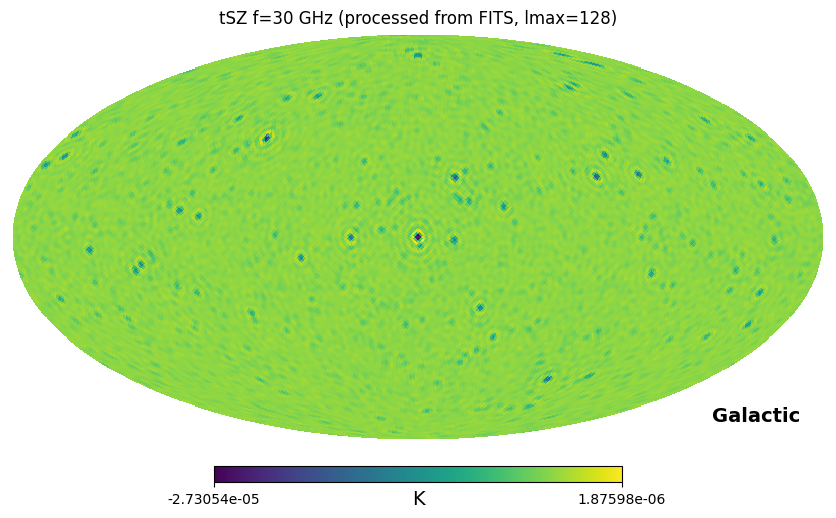

In [42]:
import os
import numpy as np
import healpy as hp
import s2fft

ft = FileTemplates(directory="/Scratch/agnes/data")
fits_path = os.path.join(ft.output_directories["cmb_realisations"], "tsz_f030.fits")

lmax = 128
L = lmax + 1

# Raw FITS (HEALPix) -> hp a_lm (truncated to lmax)
hp_map = hp.read_map(fits_path, verbose=False)
hp_alm = hp.map2alm(hp_map, lmax=lmax)

# hp a_lm -> MW a_lm -> MW pixel map
mw_alm = SamplingConverters.hp_alm_2_mw_alm(hp_alm, lmax)
mw_pix = s2fft.inverse(mw_alm, L=L)

# Visualize with your existing function
SILCTools.visualize_MW_Pix_map(
    MW_Pix_Map=mw_pix,
    title="tSZ f=30 GHz (processed from FITS, lmax=128)",
    coord=["G"],
    unit="K",
    is_MW_alm=False,
)


MW alm shape: (129, 257)


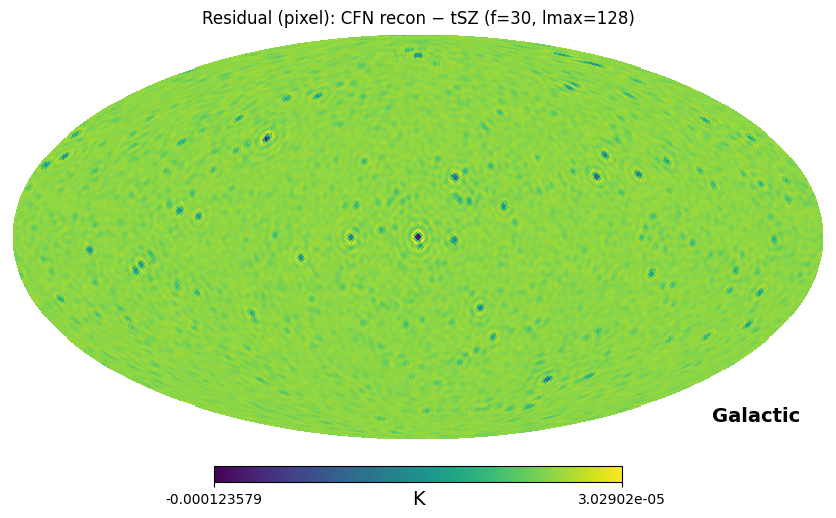

In [ ]:
# Residual (pixel space): CFN recon − tSZ
residual_mw_pix = MW_Pix - mw_pix

SILCTools.visualize_MW_Pix_map(
    MW_Pix_Map=residual_mw_pix,
    title="Residual (pixel): CFN recon − tSZ (f=30, lmax=128)",
    coord=["G"],
    unit="K",
    is_MW_alm=False,
)

--- RUNNING ILC (new functional API) ---
Device 0: bytes_in_use=879360 peak_bytes_in_use=10878208 bytes_limit=19069206528 largest_free_chunk=n/a num_allocs=302531
F_theory: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
--- ILC target='cmb'  input='cfn'  lmax=128  scales=[0, 1, 2, 3, 4, 5, 6, 7, 8] ---
f: [1.]
Processing realisation 0000 for component cfn
Doubled and saved wavelet maps in 19.68 seconds
Calculated covariance matrices in 29.84 seconds
Discovered  1 singular matrices at scale 0 realisation 0
Discovered  91 singular matrices at scale 1 realisation 0
Discovered  131841 singular matrices at scale 9 realisation 0
Calculated weight vector matrices in 7.69 seconds
→ loading: /Scratch/agnes/data/SILC/weight_vector_data/cfn_cilc_cmb_cmb_s0_r0000_lmax128_lam2.0.npy
→ loading: /Scratch/agnes/data/SILC/weight_vector_data/cfn_cilc_cmb_cmb_s1_r0000_lmax128_lam2.0.npy
→ loading: /Scratch/agnes/data/SILC/weight_vector_data/cfn_cilc_cmb_cmb_s2_r0000_lmax128_lam2.0.npy
→ loading: 

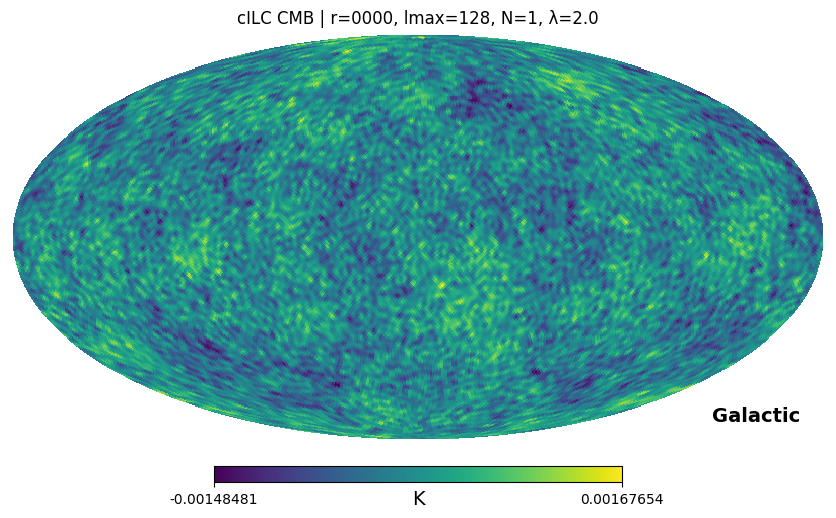

FINAL CHECK  F^T w == f  -> True


In [ ]:
pipe.F_source = "theory"  # "empirical" or "theory"
pipe.F_kwargs = {
    "base_dir": os.path.join(pipe.directory, "CMB_realisations"),
    "frequencies": pipe.frequencies,
    "realization": pipe.start_realisation, 
    "normalize": True,
    "mask_path": "",
    "file_templates": {
        "cmb": "cmb_r{realisation:04d}.fits",
        "sync": "sync_f{frequency}.fits", 
        "tsz":  "tsz_f{frequency}.fits",
    },
}
pipe.step_ilc()

In [ ]:
# --- same call you used ---
ell_ilc, cl_ilc = pipe.step_power_spec(
    unit="K",
    source="ilc_synth",
    component="cfn",
    extract_comp="cmb",
    frequencies=["030","044","070","100","143","217","353","545","857"],
    realisation=0,
    lmax=128,
    lam=2.0,
)

# --- call the 'processed' one with identical args ---
ell_proc, cl_proc = pipe.step_power_spec(
    unit="K",
    source="processed",
    component="cmb",
    extract_comp=None,
    frequencies=None,          # processed_cmb has no freq in filename
    realisation=0,
    lmax=128,
    lam=2.0,
)

# --- ratio (processed over ilc_synth) ---
import numpy as np
import matplotlib.pyplot as plt

# (optional but helpful) ensure ℓ match
assert np.array_equal(ell_ilc, ell_proc), "ℓ grids differ"
ell = ell_ilc
ratio = cl_ilc / cl_proc 

# --- plot ---
plt.figure(figsize=(6,4))
plt.plot(ell, ratio, marker='.', linestyle='-')
plt.axhline(1.0, linestyle='--', linewidth=1)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{\mathrm{ilc\_synth}/C_\ell^{\mathrm{processed}}}$')
plt.ylim(0,2)
plt.xlim(2,1024)
plt.title('Power spectrum ratio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
from skyclean.silc.map_tools import MWTools  # or: from .map_tools import MWTools

lmax = 128
L = lmax + 1
MWTools.visualise_axisym_wavelets(L=L, lam=2.0)

this is not right, could it be aliasing due to low lmax? try high lmax 

In [ ]:
import os, numpy as np

weight_dir    = "/Scratch/agnes/data/SILC/weight_vector_data"
component     = "cfn"
extract_comp  = "cmb"
realisation   = 0
lmax          = 128
lam           = "2.0"

for s in range(0, 10):  # s0..s9
    path = os.path.join(
        weight_dir,
        f"{component}_cilc_{extract_comp}_cmb_s{s}_r{realisation:04d}_lmax{lmax}_lam{lam}.npy"
    )
    if not os.path.exists(path):
        print(f"[s{s}] missing → skipped"); continue

    print("→ loading:", path)
    W = np.load(path)  # (H, W, Nf)
    if W.ndim != 3: 
        print(f"[s{s}] bad shape {W.shape} → skipped"); continue

    H, Wd, Nf = W.shape
    a = np.ones(Nf, dtype=W.dtype)
    wa = np.dot(W.reshape(-1, Nf), a).reshape(H, Wd)
    delta = wa - 1.0
    print(f"[s{s}] wa−1: mean={delta.mean():.3e}, std={delta.std():.3e}, "
          f"min={delta.min():.3e}, max={delta.max():.3e}")

In [ ]:
import os, numpy as np
import matplotlib.pyplot as plt

weight_dir    = "/Scratch/agnes/data/SILC/weight_vector_data"
component     = "cfn"
realisation   = 0
lmax          = 128
lam           = "2.0"

title_prefix = "ilc"  # <- prefix should be 'ilc'

for s in range(0, 10):  # s0..s9
    path = os.path.join(
        weight_dir,
        f"{component}_weight_vector_cmb_s{s}_r{realisation:04d}_lmax{lmax}_lam{lam}.npy"
    )
    if not os.path.exists(path):
        print(f"[s{s}] missing → skipped"); continue

    print("→ loading:", path)
    W = np.load(path)  # (H, W, Nf)
    if W.ndim != 3:
        print(f"[s{s}] bad shape {W.shape} → skipped"); continue

    H, Wd, Nf = W.shape
    a = np.ones(Nf, dtype=W.dtype)
    wa = np.dot(W.reshape(-1, Nf), a).reshape(H, Wd)
    delta = wa - 1.0

    print(f"[s{s}] Σw−1: mean={delta.mean():.3e}, std={delta.std():.3e}, "
          f"min={delta.min():.3e}, max={delta.max():.3e}")

    # --- visualise ---
    try:
        MWTools.visualise_mw_map(delta, title=f"{title_prefix}: Σw − 1 (CMB constraint, s{s})", directional=False)
    except NameError:
        plt.figure(figsize=(7,5))
        im = plt.imshow(delta, origin="lower")
        plt.title(f"{title_prefix}: Σw − 1 (CMB constraint, s{s})")
        plt.colorbar(im, label="Σw − 1")
        plt.tight_layout(); plt.show()


In [ ]:
import os, numpy as np

# ---- paste your compute_weights_generalised exactly as-is above this line ----
# (Assume it's already defined in your environment)
# -----------------------------------------------------------------------------


# ---------- Toy inputs (single pixel, 3 freqs) ----------
Nf = 3
H = W = 1

# A well-conditioned SPD covariance for the pixel
A = np.array([
    [2.0, 0, 0],
    [0, 1.0, 0],
    [0, 0, 1.5]
], dtype=np.float64)

# Pack to the shape your function expects: (Nf, Nf, H, W)
R = np.zeros((Nf, Nf, H, W), dtype=np.float64)
R[:, :, 0, 0] = A

# CMB SED in K_CMB units: a = ones
a = np.ones(Nf, dtype=np.float64)
F = a[:, None]                 # (Nf,1)
f = np.array([1.0], np.float64)

# Dummy file template (it will save a tiny .npy locally)
weight_vector_matrix_template = "/tmp/{component}_{type}_{extract_comp}_s{scale}_r{realisation:04d}_l{lmax}_lam{lam}.npy"

# Common metadata
scale = 0
realisation = 0
comp = "cfn"
L_max = 8
lam = "2.0"
extract_comp = "cmb"

# ---------- Run ILC (constraint=False) ----------
_, W_ilc_full, _, _ = SILCTools.compute_weights_generalised(
    R=R,
    scale=scale,
    realisation=realisation,
    weight_vector_matrix_template=weight_vector_matrix_template,
    comp=comp,
    L_max=L_max,
    extract_comp=None,           # not used when constraint=False
    constraint=False,
    F=None,
    f=None,
    reference_vectors=None,
    lam=lam
)
w_ilc = W_ilc_full[0, 0, :]      # (Nf,)

# ---------- Run cILC (constraint=True, F=a, f=[1]) ----------
_, W_cilc_full, _, _ = SILCTools.compute_weights_generalised(
    R=R,
    scale=scale,
    realisation=realisation,
    weight_vector_matrix_template=weight_vector_matrix_template,
    comp=comp,
    L_max=L_max,
    extract_comp=extract_comp,
    constraint=True,
    F=F,
    f=f,
    reference_vectors=None,
    lam=lam
)
w_cilc = W_cilc_full[0, 0, :]    # (Nf,)

# ---------- Diagnostics ----------
print("dtype check  : R,F,a,f ->", R.dtype, F.dtype, a.dtype, f.dtype)
print("w_ilc        :", w_ilc)
print("w_cilc       :", w_cilc)
print("||w_ilc-w_cilc|| =", np.linalg.norm(w_ilc - w_cilc))

# Use the *correct* residual (a^T w - 1). For K_CMB, a=ones so it equals sum(w)-1
res_ilc  = float(a @ w_ilc - 1.0)
res_cilc = float(a @ w_cilc - 1.0)
print("|a^T w_ilc - 1|  =", abs(res_ilc))
print("|a^T w_cilc - 1| =", abs(res_cilc))

# Also show sum(w)-1 to match your earlier check
print("sum(w_ilc)-1  =", float(w_ilc.sum() - 1.0))
print("sum(w_cilc)-1 =", float(w_cilc.sum() - 1.0))


In [ ]:
import numpy as np

# ---- choose one covariance block (edit path/pixel if needed) ----
cov_path = "/Scratch/agnes/data/SILC/covariance_matrix/" \
           "cov_MW_cfn_f030_044_070_100_143_217_353_545_857_s5\_r0000_lmax128_lam2.0.npy"
R = np.load(cov_path)  # shape (Nf, Nf, H, W)

Nf, _, H, W = R.shape
i, j = H // 2, W // 2  # test pixel

# faithful to your code: symmetrize (optional but safe) + float64
R_block = 0.5 * (R[:, :, i, j] + R[:, :, i, j].T)
R_block = R_block.astype(np.float64, copy=False)

# build a, F, f for CMB-only constraint (inputs are cmb + noise)
identity_vector = np.ones(Nf, dtype=np.float64)  # "a"
F = identity_vector[:, None]  # (Nf,1)
f = np.array([1.0], dtype=np.float64)  # (1,)

# ---------------- ILC ----------------
R_inv = np.linalg.inv(R_block)  # (Nf,Nf)
num = np.dot(R_inv, identity_vector)  # (Nf,)
den = float(np.dot(num, identity_vector))  # scalar
w_ilc = (num / den).ravel()  # (Nf,)

# ---------------- cILC ---------------
R_inv = np.linalg.inv(R_block)  # (Nf,Nf)
FT_Rinv = np.dot(F.T, R_inv)  # (1,Nf)
constraint_matrix = np.dot(FT_Rinv, F)  # (1,1)
constraint_matrix_inv = np.linalg.inv(constraint_matrix)  # (1,1)
temp = np.dot(constraint_matrix_inv, f)  # (1,)
F_temp = np.dot(F, temp)  # (Nf,1)
w_cilc = np.dot(R_inv, F_temp).ravel()  # (Nf,)

# ---------------- diagnostics ----------------
a = identity_vector
res_ilc = abs(float(np.dot(a, w_ilc) - 1.0))
res_cilc = abs(float(np.dot(a, w_cilc) - 1.0))
drift = np.linalg.norm(w_cilc - w_ilc)

print(f"Nf={Nf}, pixel=({i},{j})")
print(f"ILC |a^T w - 1| = {res_ilc:.3e}")
print(f"cILC |a^T w - 1| = {res_cilc:.3e}")
print(f"||w_cILC - w_ILC||_2 = {drift:.3e}")


In [ ]:
# ---------- APPEND-ONLY: print per-step errors for ILC and cILC ----------
import numpy as np
from numpy.linalg import norm

eps = np.finfo(np.float64).eps
I   = np.eye(R_block.shape[0])
a   = identity_vector

print("\n=== Diagnostics context ===")
print(f"float64 eps: {eps:.3e}")
try:
    print(f"cond(R_block): {np.linalg.cond(R_block):.3e}")
except Exception:
    pass

# ================= ILC steps =================
# 1) R_inv = inv(R_block)
e1_ilc = norm(np.dot(R_block, R_inv) - I, ord='fro') / norm(I, ord='fro')

# 2) num = R_inv a
e2_ilc = norm(np.dot(R_block, num) - a) / max(norm(a), eps)  # directional solve residual

# 3) den = num^T a
den_alt = float(np.dot(a, np.dot(R_inv, a)))                  # equivalent scalar route
e3_ilc = abs(float(den) - den_alt) / max(abs(float(den)), 1.0)

# 4) w = num / den
gain_ilc = abs(float(np.dot(a, w_ilc) - 1.0))                 # |a^T w - 1|
lam_ilc  = 1.0 / float(den) if float(den) != 0.0 else np.inf
kkt_ilc_num = norm(np.dot(R_block, w_ilc) - lam_ilc * a)
kkt_ilc_den = norm(R_block) * norm(w_ilc) + abs(lam_ilc) * norm(a)
kkt_ilc = kkt_ilc_num / max(kkt_ilc_den, eps)

print("\n--- ILC step-by-step ---")
print(f"1) inv(R):               ||R R^-1 - I||_F / ||I||_F      = {e1_ilc:.3e}")
print(f"2) num = R^-1 a:         ||R num - a|| / ||a||           = {e2_ilc:.3e}")
print(f"3) den = num^T a:        |den - a^T R^-1 a| / |den|      = {e3_ilc:.3e}")
print(f"4) w = num/den:          |a^T w - 1|                      = {gain_ilc:.3e}")


# ================= cILC steps =================
# 1) R_inv = inv(R_block)
e1_c = e1_ilc  # same inverse check

# 2) FT_Rinv = F^T R_inv
RinvF = np.dot(R_inv, F)                                     # (Nf,1)
e2_c = norm(np.dot(R_block, RinvF) - F) / max(norm(F), eps)  # directional residual in span(F)

# 3) C = FT_Rinv F
C_alt = float(np.dot(F.T, np.dot(R_inv, F)))                 # scalar equivalence check
e3_c = abs(float(constraint_matrix) - C_alt) / max(abs(float(constraint_matrix)), 1.0)

# 4) C_inv = inv(C)
I1 = np.eye(1)
e4_c = norm(np.dot(constraint_matrix, constraint_matrix_inv) - I1) / norm(I1)

# 5) temp = C_inv f
e5_c = norm(np.dot(constraint_matrix, temp) - f) / max(norm(f), eps)

# 6) F_temp = F temp   (pure matmul; no new residual beyond carries)

# 7) w = R_inv F_temp
constr_c = norm(np.dot(F.T, w_cilc) - f) / max(norm(f), eps)  # constraint residual
kkt_c_num = norm(np.dot(R_block, w_cilc) - np.dot(F, temp).ravel())
kkt_c_den = norm(R_block) * norm(w_cilc) + norm(F) * norm(temp)
kkt_c = kkt_c_num / max(kkt_c_den, eps)

print("\n--- cILC step-by-step ---")
print(f"1) inv(R):               ||R R^-1 - I||_F / ||I||_F      = {e1_c:.3e}")
print(f"2) F^T R^-1:             ||R (R^-1 F) - F|| / ||F||      = {e2_c:.3e}")
print(f"3) C = F^T R^-1 F:       |C - F^T R^-1 F| / |C|          = {e3_c:.3e}")
print(f"4) inv(C):               ||C C^-1 - I|| / ||I||          = {e4_c:.3e}")
print(f"5) temp = C^-1 f:        ||C temp - f|| / ||f||          = {e5_c:.3e}")
print(f"6) F temp:               (no new residual; pure multiply)")
print(f"7) w = R^-1 F temp:      ||F^T w - f|| / ||f||           = {constr_c:.3e}")

In [ ]:
HRFigures.visualise_generating_functions(L=1024, lam=2.0, J0=0)

In [ ]:
HRFigures.visualise_harmonic_generators(L=1024, lam=2.0, J0=0)

In [ ]:
# adjust the import path to match your package layout
from skyclean.silc.harmonic_response import HarmonicWindows, admissibility

# choose parameters
L, lam, J0 = 1024, 2.0, 0

# build Φ_{ℓ0} and {Ψ_{j;ℓ0}} using your class (these INCLUDE the prefactor)
hw = HarmonicWindows(L=L, lam=lam, J0=J0)
ells = hw.ells
Phi_l0 = hw.scaling()                                # shape (L,)
Psi_j_l0 = {j: hw.wavelet(j) for j in range(J0, hw.J + 1)}  # dict of shape-(L,) arrays

# call admissibility
S, ok = admissibility(Phi_l0, Psi_j_l0, ells, tol=1e-6)
print("Admissibility OK (ℓ≥1):", ok)

# optional quick plot
# import matplotlib.pyplot as plt
# plt.plot(ells, S); plt.axhline(1.0, ls=':'); plt.xlim(1, L-1); plt.xlabel("ℓ"); plt.ylabel("S_ℓ"); plt.show()


In [ ]:
from skyclean.silc.harmonic_response import HarmonicWindows, build_axisym_filter_bank
import s2fft, s2wav, numpy as np, jax.numpy as jnp

L, lam, j = 128, 2.0, 5
rng = np.random.default_rng(0)
mw_map = rng.standard_normal((L, 2*L-1))


import s2fft, s2wav, numpy as np, jax.numpy as jnp

# library analysis (axisym filters include √((2ℓ+1)/(4π)))
W_lib, _ = s2wav.analysis(jnp.asarray(mw_map), N=1, L=L, lam=lam,
                          filters=build_axisym_filter_bank(L, lam), reality=True, sampling="mw")
W_lib_j = np.array(W_lib[j][0])

# manual: multiply by κ only in harmonic space (no prefactor), then inverse SHT
hw = HarmonicWindows(L, lam)
kappa = hw.g.kappa(np.arange(L)/(lam**j))
flm   = s2fft.forward(mw_map, L=L, reality=True, sampling="mw")
W_man = s2fft.inverse(flm * kappa[:, None], L=L, reality=True, sampling="mw")

print("max |diff| =", np.max(np.abs(W_lib_j - W_man)))  # should be tiny (~1e-7 to 1e-10)
